<a href="https://colab.research.google.com/github/fkmakita/Machine_Learning_SKLearn/blob/main/Machine_Learning_Classifica%C3%A7%C3%A3o_com_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geração dos dados iniciais

In [ ]:
# features/características de cada indivíduo
# legenda = [pelo longo = 1, perna curta = 1, late = 1]

porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

# definindo as classes e armazenando em um vetor de dados
treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1, 1, 1, 0, 0, 0] # labels: porco = 1, cachorro = 0

# Etapa de construção de modelo e treino

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC() # Linear Support Vector Classification
model.fit(treino_x, treino_y) # ajuste do modelo utilizando os dados iniciais e as classes

LinearSVC()

# Teste do modelo com dados de teste

In [ ]:
animal_teste = [1, 1, 1]

model.predict([animal_teste]) # resultado do teste: cachorro = 0

array([0])

In [ ]:
teste1 = [1, 1, 1]
teste2 = [1, 1, 0]
teste3 = [0, 1, 1]

teste_x = [teste1, teste2, teste3]
classificacoes = model.predict(teste_x) # resultado do teste: cachorro, porco, cachorro

teste_y = [0, 1, 1] # labels dos testes

classificacoes == teste_y # classificador erra o último indivíduo

# cálculo manual da taxa de acerto
acertos = (classificacoes == teste_y).sum()
total = len(teste_y)
taxa_acerto = acertos/total

print("Taxa de acerto manual: %.2f%%" % (taxa_acerto * 100))

# cálculo direto da taxa de acerto
from sklearn.metrics import accuracy_score
taxa_acerto2 = accuracy_score(teste_y, classificacoes)
print("Taxa de acerto direta: %.2f%%" % (taxa_acerto2 * 100))

Taxa de acerto manual: 66.67%
Taxa de acerto direta: 66.67%


# Analisando dados CSV

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)

mapa = {
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought": "comprou"
}

dados = dados.rename(columns = mapa)
dados.head(5)

x = dados[["principal", "como_funciona", "contato"]] # características
y = dados[["comprou"]] # classes

x.head(5)

,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


# Separação dos dados em treino e teste

In [ ]:
treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

print("Treinos com %d elementos e testes com %d elementos" % (len(treino_x), len(teste_x)))

Treinos com 75 elementos e testes com 24 elementos


# Treino do modelo

In [ ]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsao = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsao)
print("Acurácia encontrada é de %.2f%%" % (acuracia * 100))

Acurácia encontrada é de 95.83%


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Separação em treino e teste com biblioteca

In [ ]:
from sklearn.model_selection import train_test_split

seed = 20 # definindo o seed a randomização utilizada é salva

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify = y) # utiliza randomização na separação de treino e teste
# Utilizando stratify = y a separação do treino e teste seguem a mesma proporção das classes de y

# Aplicando novamente as etapas anteriores
print("Treinos com %d elementos e testes com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsao = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsao)
print("Acurácia encontrada é de %.2f%%" % (acuracia * 100))

Treinos com 74 elementos e testes com 25 elementos
Acurácia encontrada é de 96.00%


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Testando em duas dimensões

In [ ]:
# Dados de projetos finalizados/não finalizados com relação de horas esperadas e preço 
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

dados = pd.read_csv(uri)

mapa = {
    'unfinished' : 'nao_finalizado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco'
}

dados = dados.rename(columns = mapa)

# inversão da coluna nao_finalizado
inverte = {
    0 : 1,
    1: 0
}

dados['finalizado'] = dados.nao_finalizado.map(inverte)

dados.head(15)

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
5,1,33,173,0
6,1,64,1965,0
7,1,99,1993,0
8,1,45,278,0
9,0,96,12479,1


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

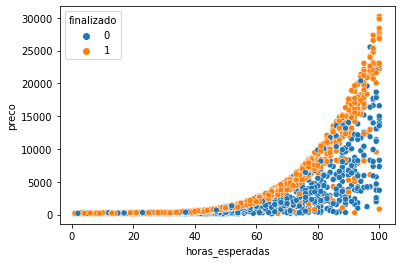

In [ ]:
import seaborn as sns

# hue define a separação das classes (finalizado/não finalizado)
sns.scatterplot(x = "horas_esperadas", y = "preco", hue = "finalizado", data = dados)

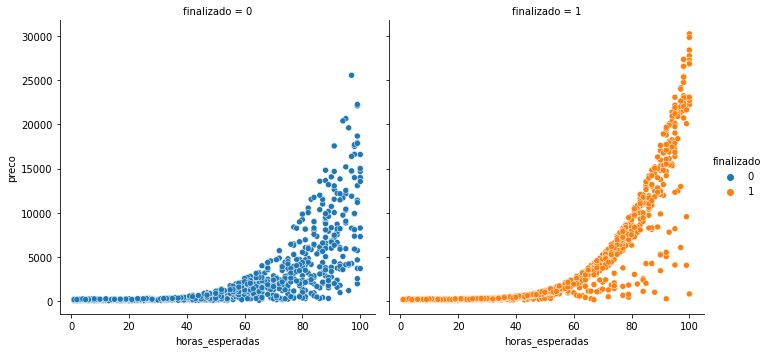

In [ ]:
# separação das classes para melhor visualização e eliminação da sobreposição de classes
sns.relplot(x = "horas_esperadas", y = "preco", col = "finalizado", hue = "finalizado", data = dados)

# Treinamento e teste do modelo com LinearSVC

In [ ]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

seed = 20 # definindo o seed a randomização utilizada é salva

# Utilizando stratify = y a separação do treino e teste seguem a mesma proporção das classes de y
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify = y) # utiliza randomização na separação de treino e teste

# Aplicando novamente as etapas anteriores
print("Treinos com %d elementos e testes com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsao = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsao)
print("Acurácia encontrada é de %.2f%%" % (acuracia * 100))
# Resultado de acurácia extremamente baixo

Treinos com 1617 elementos e testes com 540 elementos
Acurácia encontrada é de 56.11%


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
import numpy as np
# mantendo o mesmo número de elementos testados
previsoes_de_base = np.ones(540)

acuracia = accuracy_score(teste_y, previsoes_de_base)
print("Acurácia do algoritmo de baseline encontrada é de %.2f%%" % (acuracia * 100))

Acurácia do algoritmo de baseline encontrada é de 52.59%


# Investigando os resultados de acurácia e visualizando os dados testados

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

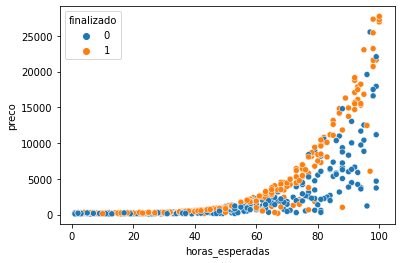

In [ ]:
# visualizando os dados de teste
sns.scatterplot(x = "horas_esperadas", y = "preco", hue = teste_y, data = teste_x)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


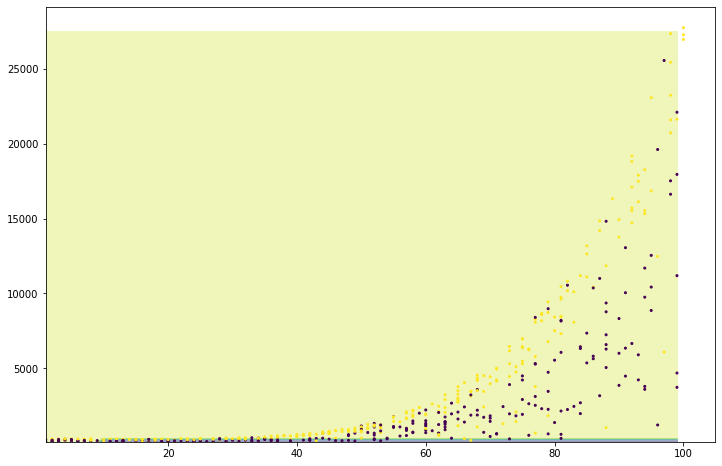

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

# Criando um grid com os eixos criados
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

# visualizando a curva de decisão (LinearSVC)
plt.figure(figsize = (12, 8))
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s = 4)

# Normalização dos dados e uso de SVC não linear

Treinos com 1617 elementos e testes com 540 elementos
Acurácia encontrada é de 70.37%


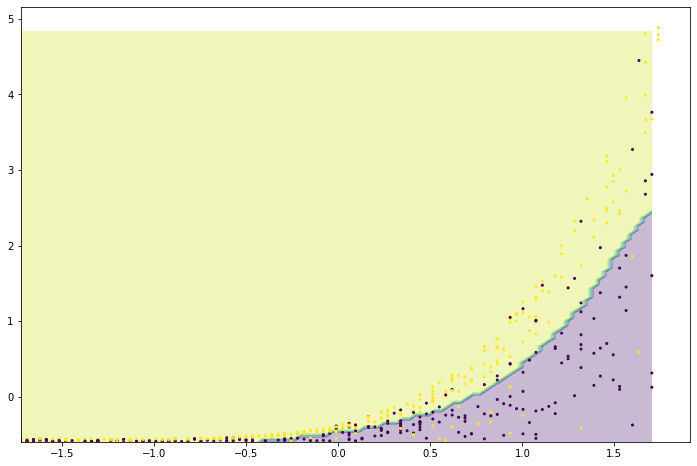

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

seed = 20 # definindo o seed a randomização utilizada é salva

# Utilizando stratify = y a separação do treino e teste seguem a mesma proporção das classes de y
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify = y) # utiliza randomização na separação de treino e teste

# Aplicando novamente as etapas anteriores
print("Treinos com %d elementos e testes com %d elementos" % (len(treino_x), len(teste_x)))

# Aplicando a normalização com StandardScaler e alterando o modelo para SVC
scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(treino_x)
teste_x = scaler.transform(teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsao = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsao)
print("Acurácia encontrada é de %.2f%%" % (acuracia * 100))
# Resultado de acurácia melhorado

# Visualização do classificador
data_x = teste_x[:, 0]
data_y = teste_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

# Criando um grid com os eixos criados
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.figure(figsize = (12, 8))
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(data_x, data_y, c = teste_y, s = 4)

# Projeto de vendas de carros

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"

dados = pd.read_csv(uri)
mapa = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}

dados = dados.rename(columns = mapa)

substituir = {
    'yes' : 1,
    'no': 0
}

dados.vendido = dados.vendido.map(substituir)
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis = 1)

dados.head(10)

x = dados[['preco', 'km_por_ano', 'idade_do_modelo']]
y = dados['vendido']

# Teste do DummyClassifier (possível baseline)

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 52.59%


In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
# classificando e calculando acurácia automaticamente
acuracia  = dummy.score(teste_x, teste_y) * 100

print("A acurácia do dummy foi %.2f%%" % acuracia)

# Árvore de decisão para classificação

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Utilizando stratify = y a separação do treino e teste seguem a mesma proporção das classes de y
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify = y) # utiliza randomização na separação de treino e teste

# Aplicando novamente as etapas anteriores
print("Treinos com %d elementos e testes com %d elementos" % (len(treino_x), len(teste_x)))

# OBS: árvores de decisão não precisam de normalização dos eixos
# scaler = StandardScaler()
# scaler.fit(treino_x)
# treino_x = scaler.transform(treino_x)
# teste_x = scaler.transform(teste_x)

# forçando a profundidade da árvore em 3
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(treino_x, treino_y)

previsao = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsao)
print("Acurácia encontrada é de %.2f%%" % (acuracia * 100))

Treinos com 7500 elementos e testes com 2500 elementos
Acurácia encontrada é de 78.40%


# Visualização gráfica da árvore de decisão

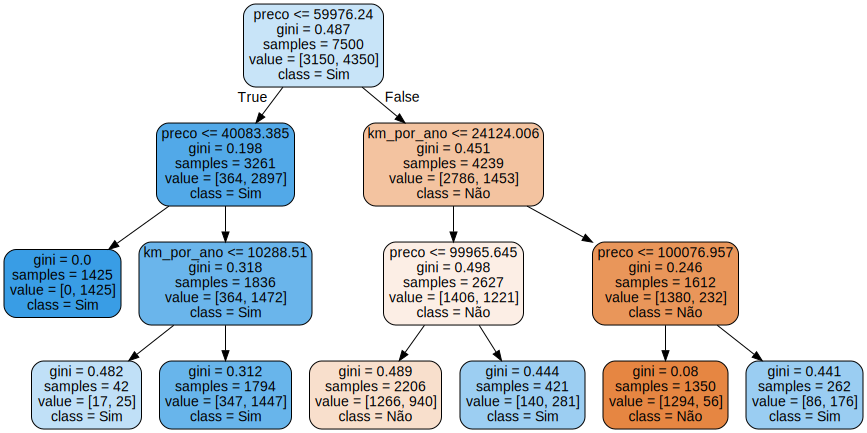

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# interpretação visual: quanto mais forte a coloração, há mais certeza na classificação
dot_data = export_graphviz(modelo, out_file = None, feature_names = x.columns, filled = True, rounded = True, class_names = ["Não", "Sim"])
grafico = graphviz.Source(dot_data)
grafico